# 장애인콜택시 대기시간 예측
## 단계3. 모델링

## 0.미션

* 1.시계열 데이터에 맞는 전처리
    * 데이터가 2015 ~ 2022년까지 데이터 입니다.
    * 이 중 2022년 10월 ~ 2022년 12월까지(3개월)의 데이터는 성능 검증용으로 사용합니다.
    * 나머지 데이터를 이용하여 학습 및 튜닝을 수행합니다.
    * 이를 위한 데이터 전처리를 수행하시오.
* 2.모델 최적화
    * 머신러닝 
        * 알고리즘 중 3가지 이상을 선정하여 모델링을 수행합니다.
        * 각각 알고리즘에 맞는 튜닝 방법으로 최적의 모델을 만듭니다.
    * 딥러닝
        * 모델 구조를 2가지 이상을 생성하고 모델링을 수행합니다.
        * epochs, learning_rate 등을 조절하며 성능을 튜닝합니다.
    * 성능 평가
        * 시계열 그래프로 모델의 실제값과 예측값을 시각화하여 비교합니다.
        * 성능 지표 (MAE, MAPE) 를 사용해 가장 성능이 높은 모델을 선정합니다.

## 1.환경설정

### (1) 라이브러리 불러오기

* **세부 요구사항**
    - 기본적으로 필요한 라이브러리를 import 하도록 코드가 작성되어 있습니다.
    - 필요하다고 판단되는 라이브러리를 추가하세요.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import joblib

# 필요하다고 판단되는 라이브러리를 추가하세요.



### (2) 데이터 로딩
* 주어진 데이터셋
    * [2.탐색적 데이터분석] 단계에서 저장한 파일 : data2.pkl
* 다음의 두가지 방법 중 하나를 선택하시오.
    * 1) 로컬 수행(Ananconda)
    * 2) 구글콜랩

#### 1) 로컬 수행(Anaconda)
* project 폴더에 필요한 파일들을 넣고, 본 파일을 열었다면, 별도 경로 지정이 필요하지 않습니다.

In [ ]:
path = ''

#### 2) 구글 콜랩 수행

* 구글 드라이브 연결

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path = '/content/drive/MyDrive/KT aivleschool/KT_aivle_school_AI_track/16. MINI_PJ6/장애인콜택시 대기시간 예측/'

#### 3) 데이터 읽어오기

In [25]:
data = joblib.load(path + 'data3.pkl')

In [26]:
data.tail()

,Date,Vehicle Operation,Service Requests,Boardings,Average Wait Time,Average Fare,Average Distance Traveled,Day of Week,Week,Month,...,temp_max,temp_min,rain(mm),humidity_max(%),humidity_min(%),sunshine(MJ/m2),season,is_holiday,moving_averages_time,moving_averages_boardings
2916,2022-12-26,603,5555,4605,39.2,2163,7889,Monday,52,12,...,3.0,-7.3,0.0,86.0,51.0,10.25,winter,0,43.485714,3855.285714
2917,2022-12-27,669,5635,4654,44.4,2198,8178,Tuesday,52,12,...,-0.3,-5.4,0.1,92.0,40.0,10.86,winter,0,42.771429,3807.000000
2918,2022-12-28,607,5654,4648,44.8,2161,7882,Wednesday,52,12,...,1.7,-7.8,0.0,71.0,34.0,10.88,winter,0,43.514286,3783.142857
2919,2022-12-29,581,5250,4247,52.5,2229,8433,Thursday,52,12,...,2.1,-4.0,0.0,87.0,38.0,10.84,winter,0,42.957143,3716.142857
2920,2022-12-30,600,5293,4200,38.3,2183,8155,Friday,52,12,...,-4.4,-4.4,0.0,66.0,66.0,0.00,winter,0,41.042857,3693.142857


## 2.데이터 준비
* **세부요구사항**
    * NaN에 대한 조치를 수행하시오.
        * rolling 혹은 shift로 발생된 초기 행의 NaN은 삭제해도 무방합니다.
    * 가변수화 : 범주형에 대해서 가변수화를 수행합니다.
    * 데이터분할
        * 시계열 데이터 특성에 맞게 분할합니다.
        * 마지막 91일(3개월) 데이터를 검증셋으로 사용합니다.

In [27]:
# Date 열을 index로
data.set_index('Date', inplace = True)

In [28]:
data.tail()

,Vehicle Operation,Service Requests,Boardings,Average Wait Time,Average Fare,Average Distance Traveled,Day of Week,Week,Month,Year,...,temp_max,temp_min,rain(mm),humidity_max(%),humidity_min(%),sunshine(MJ/m2),season,is_holiday,moving_averages_time,moving_averages_boardings
Date,,,,,,,,,,,,,,,,,,,,,
2022-12-26,603,5555,4605,39.2,2163,7889,Monday,52,12,2022,...,3.0,-7.3,0.0,86.0,51.0,10.25,winter,0,43.485714,3855.285714
2022-12-27,669,5635,4654,44.4,2198,8178,Tuesday,52,12,2022,...,-0.3,-5.4,0.1,92.0,40.0,10.86,winter,0,42.771429,3807.000000
2022-12-28,607,5654,4648,44.8,2161,7882,Wednesday,52,12,2022,...,1.7,-7.8,0.0,71.0,34.0,10.88,winter,0,43.514286,3783.142857
2022-12-29,581,5250,4247,52.5,2229,8433,Thursday,52,12,2022,...,2.1,-4.0,0.0,87.0,38.0,10.84,winter,0,42.957143,3716.142857
2022-12-30,600,5293,4200,38.3,2183,8155,Friday,52,12,2022,...,-4.4,-4.4,0.0,66.0,66.0,0.00,winter,0,41.042857,3693.142857


### (1) NA 조치

In [29]:
data.isna().sum()

Vehicle Operation            0
Service Requests             0
Boardings                    0
Average Wait Time            0
Average Fare                 0
Average Distance Traveled    0
Day of Week                  0
Week                         0
Month                        0
Year                         0
prediction_date              0
target                       0
temp_max                     0
temp_min                     0
rain(mm)                     0
humidity_max(%)              0
humidity_min(%)              0
sunshine(MJ/m2)              0
season                       0
is_holiday                   0
moving_averages_time         0
moving_averages_boardings    0
dtype: int64

In [30]:
# NaN 값 제거
data.dropna(inplace = True)

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2921 entries, 2015-01-01 to 2022-12-30
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Vehicle Operation          2921 non-null   int64         
 1   Service Requests           2921 non-null   int64         
 2   Boardings                  2921 non-null   int64         
 3   Average Wait Time          2921 non-null   float64       
 4   Average Fare               2921 non-null   int64         
 5   Average Distance Traveled  2921 non-null   int64         
 6   Day of Week                2921 non-null   object        
 7   Week                       2921 non-null   int64         
 8   Month                      2921 non-null   int64         
 9   Year                       2921 non-null   int64         
 10  prediction_date            2921 non-null   datetime64[ns]
 11  target                     2921 non-null   float64 

### (2) 가변수화

In [32]:
# 범주형 변수 가변수화
data = pd.get_dummies(data, columns=['Day of Week', 'Week', 'Month', 'Year', 'season', 'is_holiday'], drop_first = True)

In [33]:
data.tail()

,Vehicle Operation,Service Requests,Boardings,Average Wait Time,Average Fare,Average Distance Traveled,prediction_date,target,temp_max,temp_min,...,Year_2017,Year_2018,Year_2019,Year_2020,Year_2021,Year_2022,season_spring,season_summer,season_winter,is_holiday_1
Date,,,,,,,,,,,,,,,,,,,,,
2022-12-26,603,5555,4605,39.2,2163,7889,2022-12-27,44.4,3.0,-7.3,...,0,0,0,0,0,1,0,0,1,0
2022-12-27,669,5635,4654,44.4,2198,8178,2022-12-28,44.8,-0.3,-5.4,...,0,0,0,0,0,1,0,0,1,0
2022-12-28,607,5654,4648,44.8,2161,7882,2022-12-29,52.5,1.7,-7.8,...,0,0,0,0,0,1,0,0,1,0
2022-12-29,581,5250,4247,52.5,2229,8433,2022-12-30,38.3,2.1,-4.0,...,0,0,0,0,0,1,0,0,1,0
2022-12-30,600,5293,4200,38.3,2183,8155,2022-12-31,33.7,-4.4,-4.4,...,0,0,0,0,0,1,0,0,1,0


In [36]:
data.drop('prediction_date', axis = 1, inplace = True)

### (3) 데이터분할
* **세부요구사항**
    * 마지막 91일 간의 데이터를 검증 셋으로 만듭니다. (2022-10-01 ~ )
    * 이 기간의 날짜 리스트를 별도로 저장하여, 모델 검증시 시각화할 때 활용합니다.

In [15]:
# # 마지막 91일 간의 데이터를 검증 셋으로 만들기(2022.10.01 ~ )
# train = data[:-91]
# val = data[-91:]

#### 1) x, y 나누기

In [37]:
# 입력 및 출력 변수 선택
X = data.drop('target', axis=1)
y = data['target']

#### 2) train : validation 나누기
* 힌트 : train_test_split(  ,   ,  test_size = 91, shuffle = False) 

In [38]:
from sklearn.model_selection import train_test_split

# 데이터 분할
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=91, shuffle=False)


### (4) Scaling
* KNN, SVM 알고리즘 및 DL을 적용하기 위해서는 스케일링을 해야 합니다.

In [39]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

In [69]:
X_train_scaled

array([[-1.54614865, -1.92387329, -1.89056962, ..., -0.59285784,
         1.75940721,  4.77299828],
       [ 0.03749257, -0.49683467, -0.34413234, ..., -0.59285784,
         1.75940721, -0.20951191],
       [-1.57675041, -1.50612194, -1.41412158, ..., -0.59285784,
         1.75940721, -0.20951191],
       ...,
       [ 1.95010272,  1.52441348,  1.54308642, ..., -0.59285784,
        -0.56837325, -0.20951191],
       [ 1.83534612,  1.39006465,  1.40741986, ..., -0.59285784,
        -0.56837325, -0.20951191],
       [ 1.85829744,  1.27443107,  1.26852315, ..., -0.59285784,
        -0.56837325, -0.20951191]])

## 3.모델링
* **세부요구사항**
    * 머신러닝 알고리즘 중 3가지 이상을 사용하여 모델을 만들고 튜닝을 수행합니다.
    * 딥러닝 모델 구조 2가지 이상을 설계하고 모델을 생성합니다.
    * 성능 측정은 MAE, MAPE로 수행합니다.
    * 모델링 후 실제값과 예측값을 시각화(라인차트)하여 분석합니다.

### (1) 머신러닝

#### 1) AutoML

In [42]:
!pip install pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 481.8/481.8 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.2/212.2 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 21.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.0/150.0 kB 12.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 37.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.8/105.8 kB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.2/81.2 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.4/46.4 kB 5.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requi

In [61]:
from pycaret.regression import *
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

# 데이터셋 로딩
data = joblib.load(path + 'data3.pkl')

# Date 열을 index로
data.set_index('Date', inplace = True)

# 시계열 데이터타입 삭제
data.drop('prediction_date', axis = 1, inplace = True)

# # 범주형 변수 가변수화
data = pd.get_dummies(data, columns=['Day of Week', 'Week', 'Month', 'Year', 'season', 'is_holiday'], drop_first = True)

# pycaret 설정
reg = setup(data, target='target', train_size = 0.8, fold=5)

# 모델링
best_model = compare_models(fold=5)

# 검증셋 예측 및 성능 측정
y_pred = predict_model(best_model, data=X_val)
y_pred = y_pred.rename(columns={'prediction_label': 'Label'})
mae = mean_absolute_error(y_val, y_pred['Label'])
mape = mean_absolute_percentage_error(y_val, y_pred['Label'])
print(f"MAE: {mae:.2f}, MAPE: {mape:.2%}")


,Description,Value
0,Session id,2258
1,Target,target
2,Target type,Regression
3,Original data shape,"(2921, 95)"
4,Transformed data shape,"(2921, 95)"
5,Transformed train set shape,"(2336, 95)"
6,Transformed test set shape,"(585, 95)"
7,Numeric features,94
8,Preprocess,True
9,Imputation type,simple


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,5.3409,60.8618,7.7938,0.6934,0.1782,0.1373,2.8960
br,Bayesian Ridge,5.5856,61.8139,7.8560,0.6877,0.1838,0.1466,0.1580
rf,Random Forest Regressor,5.4458,61.9940,7.8678,0.6875,0.1806,0.1406,5.3500
ridge,Ridge Regression,5.6583,62.6675,7.9110,0.6833,0.1874,0.1495,0.1380
lr,Linear Regression,5.6748,62.7406,7.9161,0.6830,0.1883,0.1504,0.1640
gbr,Gradient Boosting Regressor,5.5511,63.9165,7.9874,0.6783,0.1822,0.1431,1.0600
lightgbm,Light Gradient Boosting Machine,5.5464,64.1506,8.0079,0.6762,0.1826,0.1424,0.4100
omp,Orthogonal Matching Pursuit,5.8157,64.5485,8.0300,0.6744,0.1894,0.1530,0.2280
en,Elastic Net,5.8192,64.6144,8.0339,0.6741,0.1895,0.1532,0.2640
lasso,Lasso Regression,5.8198,64.6194,8.0342,0.6740,0.1895,0.1532,0.2500


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

MAE: 0.98, MAPE: 2.39%


#### 2) 모델2

In [63]:
!pip install h2o

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.6/177.6 MB 6.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for h2o: filename=h2o-3.40.0.3-py2.py3-none-any.whl size=177694727 sha256=592bc5a213696f431bd1952e5e99f1af3e5f1c6acfa5235edbbdd4db5eda283f
  Stored in directory: /root/.cache/pip/wheels/9a/54/b6/c9ab3e71309ef0000bbe39e715020dc151bbfc557784b7f4c9
Successfully built h2o


In [81]:
import h2o
from h2o.automl import H2OAutoML
import numpy as np

# train 데이터를 H2OFrame 형태로 변환
h2o.init()

# y_train을 리스트로 변환
y_train_list = list(y_train)

# y_train 리스트와 X_train_scaled 넘파이 배열을 합쳐 H2OFrame 형태로 변환
train_h2o = h2o.H2OFrame(np.concatenate([X_train_scaled, np.array(y_train_list).reshape(-1, 1)], axis=1))

# validation 데이터를 H2OFrame 형태로 변환
val_h2o = h2o.H2OFrame(X_val_scaled)

# 타겟 변수와 예측 변수 설정
x = train_h2o.columns[:-1]
y = y_train

# H2O AutoML 설정
aml = H2OAutoML(max_models=10, seed=1)

# 모델 학습
aml.train(x=x, y=y, training_frame=train_h2o)


Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,23 mins 49 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.40.0.3
H2O_cluster_version_age:,15 days
H2O_cluster_name:,H2O_from_python_unknownUser_xafmiv
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.163 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


H2OTypeError: ignored

In [66]:
train_h2o

C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,C15,C16,C17,C18,C19,C20,C21,C22,C23,C24,C25,C26,C27,C28,C29,C30,C31,C32,C33,C34,C35,C36,C37,C38,C39,C40,C41,C42,C43,C44,C45,C46,C47,C48,C49,C50,C51,C52,C53,C54,C55,C56,C57,C58,C59,C60,C61,C62,C63,C64,C65,C66,C67,C68,C69,C70,C71,C72,C73,C74,C75,C76,C77,C78,C79,C80,C81,C82,C83,C84,C85,C86,C87,C88,C89,C90,C91,C92,C93,C94
-1.54615,-1.92387,-1.89057,-1.19135,1.14142,1.47659,-1.89519,-1.7149,-0.266808,-1.13781,-0.78912,-0.646436,-1.38989,-5.29382,-0.40808,-0.40808,-0.40808,2.44697,-0.40808,-0.40808,-0.142083,-0.142083,-0.142083,-0.142083,-0.142083,-0.142083,-0.142083,-0.142083,-0.142083,-0.142083,-0.142083,-0.142083,-0.142083,-0.142083,-0.142083,-0.142083,-0.142083,-0.142083,-0.142083,-0.142083,-0.142083,-0.142083,-0.142083,-0.142083,-0.142083,-0.142083,-0.142083,-0.142083,-0.142083,-0.142083,-0.142083,-0.142083,-0.142083,-0.142083,-0.142083,-0.142083,-0.142083,-0.139472,-0.132739,-0.132739,-0.132739,-0.132739,-0.132739,-0.132739,-0.132739,-0.132739,-0.132739,-0.132739,-0.132739,-0.132739,-0.132739,-0.0705095,-0.294601,-0.309919,-0.304408,-0.309919,-0.304408,-0.309919,-0.309919,-0.304408,-0.288178,-0.283112,-0.288178,-0.385408,-0.384803,-0.384803,-0.384803,-0.385408,-0.384803,-0.32675,-0.592858,-0.592858,1.75941,4.773
0.0374926,-0.496835,-0.344132,-1.61186,-0.831814,-0.64009,-1.48401,-1.74269,-0.266808,-0.427885,-0.2435,-0.7051,-1.63553,-3.12553,-0.40808,-0.40808,-0.40808,-0.408669,-0.40808,-0.40808,-0.142083,-0.142083,-0.142083,-0.142083,-0.142083,-0.142083,-0.142083,-0.142083,-0.142083,-0.142083,-0.142083,-0.142083,-0.142083,-0.142083,-0.142083,-0.142083,-0.142083,-0.142083,-0.142083,-0.142083,-0.142083,-0.142083,-0.142083,-0.142083,-0.142083,-0.142083,-0.142083,-0.142083,-0.142083,-0.142083,-0.142083,-0.142083,-0.142083,-0.142083,-0.142083,-0.142083,-0.142083,-0.139472,-0.132739,-0.132739,-0.132739,-0.132739,-0.132739,-0.132739,-0.132739,-0.132739,-0.132739,-0.132739,-0.132739,-0.132739,-0.132739,-0.0705095,-0.294601,-0.309919,-0.304408,-0.309919,-0.304408,-0.309919,-0.309919,-0.304408,-0.288178,-0.283112,-0.288178,-0.385408,-0.384803,-0.384803,-0.384803,-0.385408,-0.384803,-0.32675,-0.592858,-0.592858,1.75941,-0.209512
-1.57675,-1.50612,-1.41412,-0.981091,0.673831,0.920138,-0.941995,-0.87212,-0.266808,0.707991,1.02961,-1.183,-1.47177,-3.40294,-0.40808,2.4505,-0.40808,-0.408669,-0.40808,-0.40808,-0.142083,-0.142083,-0.142083,-0.142083,-0.142083,-0.142083,-0.142083,-0.142083,-0.142083,-0.142083,-0.142083,-0.142083,-0.142083,-0.142083,-0.142083,-0.142083,-0.142083,-0.142083,-0.142083,-0.142083,-0.142083,-0.142083,-0.142083,-0.142083,-0.142083,-0.142083,-0.142083,-0.142083,-0.142083,-0.142083,-0.142083,-0.142083,-0.142083,-0.142083,-0.142083,-0.142083,-0.142083,-0.139472,-0.132739,-0.132739,-0.132739,-0.132739,-0.132739,-0.132739,-0.132739,-0.132739,-0.132739,-0.132739,-0.132739,-0.132739,-0.132739,-0.0705095,-0.294601,-0.309919,-0.304408,-0.309919,-0.304408,-0.309919,-0.309919,-0.304408,-0.288178,-0.283112,-0.288178,-0.385408,-0.384803,-0.384803,-0.384803,-0.385408,-0.384803,-0.32675,-0.592858,-0.592858,1.75941,-0.209512
-1.67621,-1.50746,-1.40443,-1.10024,1.17883,1.66437,-0.970031,-0.973995,-0.266808,1.13394,0.665866,-1.01702,-1.42469,-3.53485,-0.40808,-0.40808,2.4505,-0.408669,-0.40808,-0.40808,-0.142083,-0.142083,-0.142083,-0.142083,-0.142083,-0.142083,-0.142083,-0.142083,-0.142083,-0.142083,-0.142083,-0.142083,-0.142083,-0.142083,-0.142083,-0.142083,-0.142083,-0.142083,-0.142083,-0.142083,-0.142083,-0.142083,-0.142083,-0.142083,-0.142083,-0.142083,-0.142083,-0.142083,-0.142083,-0.142083,-0.142083,-0.142083,-0.142083,-0.142083,-0.142083,-0.142083,-0.142083,-0.139472,-0.132739,-0.132739,-0.132739,-0.132739,-0.132739,-0.132739,-0.132739,-0.132739,-0.132739,-0.132739,-0.132739,-0.132739,-0.132739,-0.0705095,-0.294601,-0.309919,-0.304408,-0.309919,-0.304408,-0.309919,-0.309919,-0.304408,-0.288178,-0.283112,-0.288178,-0.385408,-0.384803,-0.384803,-0.384803,-0.385408,-0.384803,-0.32675,-0

#### 3) RF

In [82]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# 모델 정의
rf_model = RandomForestRegressor(random_state=42)

# 하이퍼파라미터 그리드 설정
rf_param_grid = {
    'n_estimators': [100, 300, 500],
    'max_depth': [10, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# 그리드 서치 수행
rf_grid = GridSearchCV(rf_model, rf_param_grid, cv=5, n_jobs=-1)
rf_grid.fit(X_train, y_train)

# 최적의 모델 선택
rf_best = rf_grid.best_estimator_

# 검증셋 예측 및 성능 측정
y_pred = rf_best.predict(X_val)
mae = mean_absolute_error(y_val, y_pred)
mape = mean_absolute_percentage_error(y_val, y_pred)
print(f"MAE: {mae:.2f}, MAPE: {mape:.2%}")


MAE: 4.69, MAPE: 11.38%


## 4) XGB

In [83]:
import xgboost as xgb

# 모델 정의
xgb_model = xgb.XGBRegressor(objective ='reg:squarederror', random_state=42)

# 하이퍼파라미터 그리드 설정
xgb_param_grid = {
    'n_estimators': [100, 300, 500],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.5]
}

# 그리드 서치 수행
xgb_grid = GridSearchCV(xgb_model, xgb_param_grid, cv=5, n_jobs=-1)
xgb_grid.fit(X_train, y_train)

# 최적의 모델 선택
xgb_best = xgb_grid.best_estimator_

# 검증셋 예측 및 성능 측정
y_pred = xgb_best.predict(X_val)
mae = mean_absolute_error(y_val, y_pred)
mape = mean_absolute_percentage_error(y_val, y_pred)
print(f"MAE: {mae:.2f}, MAPE: {mape:.2%}")


MAE: 4.70, MAPE: 11.46%


### (2) 딥러닝

In [85]:
X_train.shape, y_train.shape

((2830, 94), (2830,))

In [90]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

# 모델 선언
model = Sequential()

# 모델 조립
model.add(Dense(64, activation = 'relu', input_shape = (94, )))
model.add(Dropout(0.3))
model.add(Dense(32, activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(16, activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation = 'linear'))

# 모델 컴파일
model.compile(loss = 'mse', optimizer = 'adam')

# 요약
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 64)                6080      
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_5 (Dense)             (None, 32)                2080      
                                                                 
 dropout_4 (Dropout)         (None, 32)                0         
                                                                 
 dense_6 (Dense)             (None, 16)                528       
                                                                 
 dropout_5 (Dropout)         (None, 16)                0         
                                                                 
 dense_7 (Dense)             (None, 1)                

In [100]:
history = model.fit(X_train, y_train,
                    validation_data = (X_test, y_test),
                    epochs = 10, 
                    verbose = 1,
                    batch_size = 16)

Epoch 1/10
177/177 [==============================] - 1s 7ms/step - loss: 1593.1281 - val_loss: 355.6059
Epoch 2/10
177/177 [==============================] - 1s 5ms/step - loss: 1263.7191 - val_loss: 398.4957
Epoch 3/10
177/177 [==============================] - 1s 5ms/step - loss: 1019.1155 - val_loss: 338.0179
Epoch 4/10
177/177 [==============================] - 1s 3ms/step - loss: 920.2488 - val_loss: 347.2636
Epoch 5/10
177/177 [==============================] - 1s 3ms/step - loss: 832.1000 - val_loss: 349.9846
Epoch 6/10
177/177 [==============================] - 1s 3ms/step - loss: 860.9042 - val_loss: 285.7008
Epoch 7/10
177/177 [==============================] - 1s 3ms/step - loss: 736.8844 - val_loss: 332.9370
Epoch 8/10
177/177 [==============================] - 0s 3ms/step - loss: 688.3363 - val_loss: 297.5464
Epoch 9/10
177/177 [==============================] - 0s 3ms/step - loss: 665.2702 - val_loss: 324.9719
Epoch 10/10
177/177 [==============================] - 0s 2ms

In [101]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [102]:
# val_loss 모니터링해서 성능이 5번 지나도록 좋아지지 않으면 조기 종료
early_stop = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 5)

In [103]:
# val_loss 가장 낮은 값을 가질 때마다 모델 저장
check_point = ModelCheckpoint('best_model.h5', verbose = 1,
                              monitor = 'val_loss', mode = 'min', save_best_only = True)

In [104]:
history = model.fit(x = X_train, y = y_train, epochs = 10, batch_size = 20,
                    validation_data = [X_test, y_test], verbose = 1,
                    callbacks = [early_stop, check_point])

Epoch 1/10
140/142 [============================>.] - ETA: 0s - loss: 640.4364
Epoch 1: val_loss improved from inf to 325.30884, saving model to best_model.h5
142/142 [==============================] - 1s 8ms/step - loss: 640.4313 - val_loss: 325.3088
Epoch 2/10
135/142 [===========================>..] - ETA: 0s - loss: 635.3245
Epoch 2: val_loss did not improve from 325.30884
142/142 [==============================] - 1s 8ms/step - loss: 632.3069 - val_loss: 329.4740
Epoch 3/10
135/142 [===========================>..] - ETA: 0s - loss: 613.9964
Epoch 3: val_loss improved from 325.30884 to 324.08109, saving model to best_model.h5
142/142 [==============================] - 1s 5ms/step - loss: 610.4572 - val_loss: 324.0811
Epoch 4/10
119/142 [========================>.....] - ETA: 0s - loss: 607.0297
Epoch 4: val_loss improved from 324.08109 to 309.96194, saving model to best_model.h5
142/142 [==============================] - 1s 4ms/step - loss: 614.7318 - val_loss: 309.9619
Epoch 5/10


In [107]:
history.history

{'loss': [640.4313354492188,
  632.306884765625,
  610.4572143554688,
  614.7318115234375,
  584.45849609375,
  587.6744384765625,
  581.05810546875,
  566.8101196289062,
  622.7767333984375,
  546.7142944335938],
 'val_loss': [325.308837890625,
  329.4740295410156,
  324.0810852050781,
  309.9619445800781,
  290.3005065917969,
  295.0414123535156,
  304.4088134765625,
  338.8414001464844,
  364.8982238769531,
  354.26031494140625]}

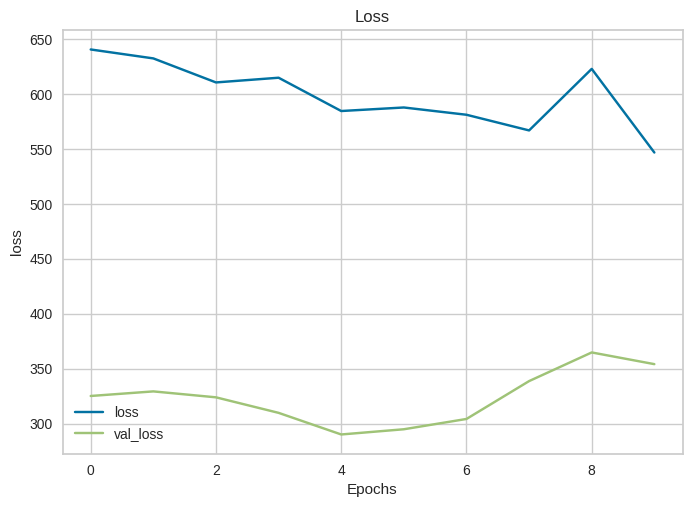

In [108]:
# 성능 시각화
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend(['loss', 'val_loss'])
plt.show()

In [89]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2830, 94), (91, 96), (2830,), (91,))

In [94]:
X_test.drop('prediction_date', axis = 1, inplace = True)

In [95]:
X_test.set_index('Date', inplace = True)

In [97]:
y_pred = model.predict(X_test)

3/3 [==============================] - 0s 3ms/step


In [98]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

print('mse : ', mean_squared_error(y_test, y_pred))
print('mae : ', mean_absolute_error(y_test, y_pred))
print('R2 score : ', r2_score(y_test, y_pred))

mse :  405.16236706719167
mae :  18.950836862836564
R2 score :  -9.901762574560554


#### 1) 모델1

#### 2) 모델2

## 4.모델 비교
* **세부요구사항**
    * 모델링 단계에서 생성한 모든 모델의 성능을 하나로 모아서 비교합니다.
    * 가장 성능이 높은 모델을 선정합니다.